In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.qhm import alpha_solver, beta_solver, nu_solver, qhm_rate, qhm

%matplotlib inline

In [2]:
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams.update({'font.size': 30})

## In this notebook you can find code to reproduce all experiments from "Understanding the Role of Momentum in Stochastic Gradient Methods" paper

### Numerical estimation of the local convergence rate (Section 3, Appendix D)

#### The following code can be used to generate plots from Figure 1

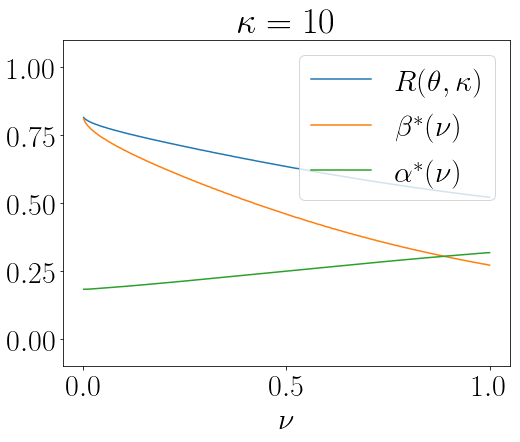

In [3]:
mu = 1.0
L = 10.0
sz = 500
nus = np.linspace(0.001, 1.0, sz)
res = np.empty(sz)
res2 = np.empty(sz)
res3 = np.empty(sz)
for i, nu in enumerate(nus):
    res[i] = beta_solver(nu, mu, L, sz=1000)
    opt_beta = res[i]
    opt_alpha = alpha_solver(opt_beta, nu, mu, L)
    res3[i] = opt_alpha
    res2[i] = qhm_rate(opt_alpha, opt_beta, nu, [mu, L])

plt.figure(figsize=(8, 6))
plt.plot(nus, res2, label="$R(\\theta, \\kappa)$")
plt.plot(nus, res, label="$\\beta^*(\\nu)$")
plt.plot(nus, res3, label="$\\alpha^*(\\nu)$")
plt.xlabel('$\\nu$')
plt.ylim(-0.1, 1.1)
plt.title('$\\kappa={}$'.format(int(L)))
plt.legend();
# uncomment next line to save pdf of the figure
# plt.savefig('figure1-a.pdf', bbox_inches="tight")

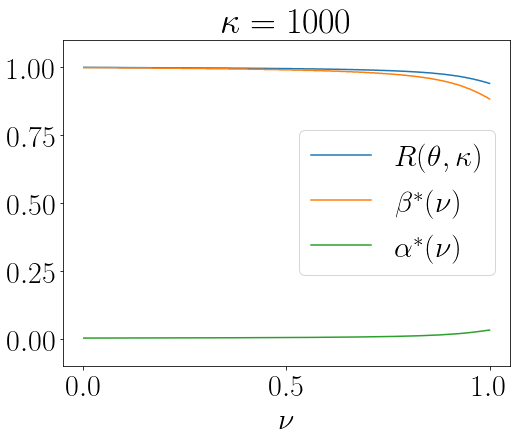

In [4]:
mu = 1.0
L = 1000.0
sz = 500
nus = np.linspace(0.001, 1.0, sz)
res = np.empty(sz)
res2 = np.empty(sz)
res3 = np.empty(sz)
for i, nu in enumerate(nus):
    res[i] = beta_solver(nu, mu, L, sz=1000)
    opt_beta = res[i]
    opt_alpha = alpha_solver(opt_beta, nu, mu, L)
    res3[i] = opt_alpha
    res2[i] = qhm_rate(opt_alpha, opt_beta, nu, [mu, L])

plt.figure(figsize=(8, 6))
plt.plot(nus, res2, label="$R(\\theta, \\kappa)$")
plt.plot(nus, res, label="$\\beta^*(\\nu)$")
plt.plot(nus, res3, label="$\\alpha^*(\\nu)$")
plt.xlabel('$\\nu$')
plt.ylim(-0.1, 1.1)
plt.title('$\\kappa={}$'.format(int(L)))
plt.legend();
# uncomment next line to save pdf of the figure
# plt.savefig('figure1-b.pdf', bbox_inches="tight")

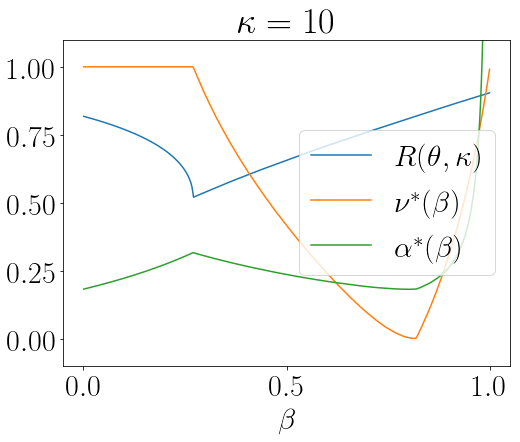

In [5]:
mu = 1.0
L = 10.0
sz = 500
betas = np.linspace(0.001, 0.999, sz)
res = np.empty(sz)
res2 = np.empty(sz)
res3 = np.empty(sz)
for i, beta in enumerate(betas):
    res[i] = nu_solver(beta, mu, L)
    opt_nu = res[i]
    opt_alpha = alpha_solver(beta, opt_nu, mu, L)
    res2[i] = qhm_rate(opt_alpha, beta, opt_nu, [mu, L])
    res3[i] = opt_alpha

plt.figure(figsize=(8, 6))
plt.plot(betas, res2, label="$R(\\theta, \\kappa)$")
plt.plot(betas, res, label="$\\nu^*(\\beta)$")
plt.plot(betas, res3, label="$\\alpha^*(\\beta)$")
plt.xlabel('$\\beta$')
plt.ylim(-0.1, 1.1)
plt.title('$\\kappa={}$'.format(int(L)))

plt.legend();
# uncomment next line to save pdf of the figure
# plt.savefig('figure1-c.pdf'.format(int(L)), bbox_inches="tight")

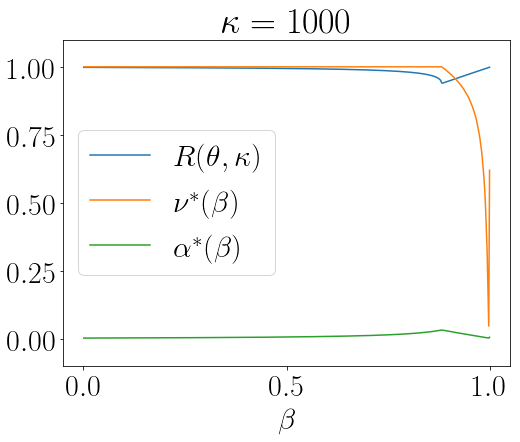

In [6]:
mu = 1.0
L = 1000.0
sz = 500
betas = np.linspace(0.001, 0.999, sz)
res = np.empty(sz)
res2 = np.empty(sz)
res3 = np.empty(sz)
for i, beta in enumerate(betas):
    res[i] = nu_solver(beta, mu, L)
    opt_nu = res[i]
    opt_alpha = alpha_solver(beta, opt_nu, mu, L)
    res2[i] = qhm_rate(opt_alpha, beta, opt_nu, [mu, L])
    res3[i] = opt_alpha

plt.figure(figsize=(8, 6))
plt.plot(betas, res2, label="$R(\\theta, \\kappa)$")
plt.plot(betas, res, label="$\\nu^*(\\beta)$")
plt.plot(betas, res3, label="$\\alpha^*(\\beta)$")
plt.xlabel('$\\beta$')
plt.ylim(-0.1, 1.1)
plt.title('$\\kappa={}$'.format(int(L)))

plt.legend()
# uncomment next line to save pdf of the figure
# plt.savefig('figure1-d.pdf'.format(int(L)), bbox_inches="tight")

In Section 2 we made the conjecture "_that the optimal convergence rate is a  monotonically decreasing function of $\nu$ (if $\alpha$ and $\beta$ are chosen optimally for each $\nu$)._"

To reproduce this experiment (using the procedure described in Appendix D) you can execute `./conj_tries.sh` from `code` folder. If your system has multiple cores, it is highly recommended to run conjecture verification in parallel. E.g. you can use GNU Parallel Command-Line Tool. The following command can be used on linux to verify conjecture using 10 parallel processes: `cat conj_tries.sh | parallel -j10`. 

Note that even when running in parallel, this command might take couple of days to finish. If you want to run it faster, you can adjust the estimation precision (`alpha_eps`, `beta_eps`, `nu_grid_size`, `kappa_grid_size`). However, in that case, you might also need to adjust the verification threshold (hard-coded at $10^{-4}$ in `verify_conjecture` function. If the conjecture was verified successfully you will see "Conjecture verified!" message.

After `conj_tries.sh` has finished, you can run the following code to generate plot from Figure 5

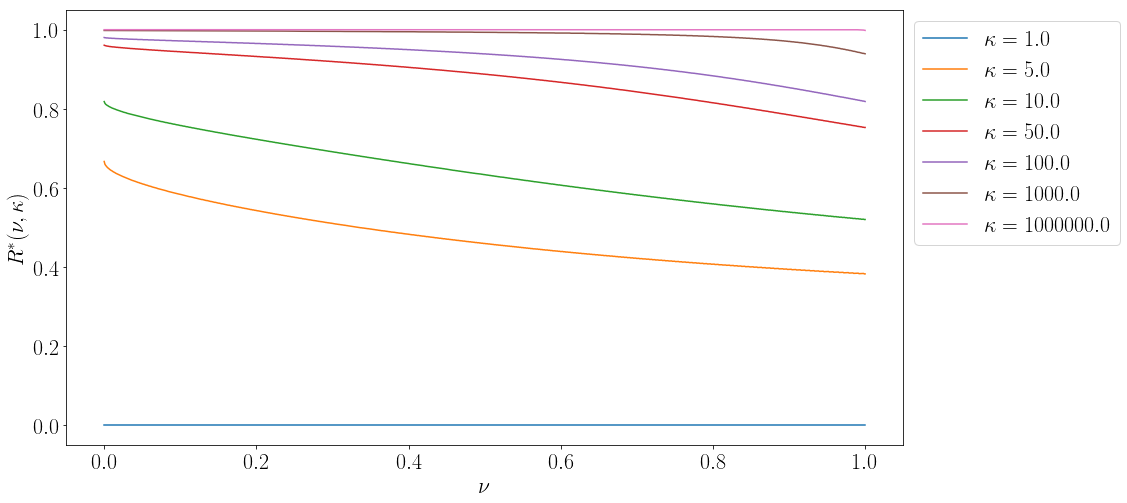

In [7]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(15, 8))

for kappa, idx in zip([1.0, 5.0, 10.0, 50.0, 100.0, 1000.0, 1e6], [1, 2, 3, 4, 5, 7, 10]):
    rates = np.load('utils/results-{}/kappa-{}.npy'.format(idx, kappa))
    nus = np.linspace(0.0, 1.0, 1000)
    plt.plot(nus, rates, label="$\\kappa={}$".format(kappa))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('$\\nu$')
plt.ylabel('$R^*(\\nu, \\kappa)$');
# uncomment next line to save pdf of the figure
# plt.savefig("figure5.pdf", bbox_inches="tight")

### Stationary analysis experiments (Section 4, Appendix F, Appendix G)

In [8]:
plt.rcParams.update({'font.size': 35})

L = 1.0
mu = 0.1
b = np.array([2.0, 1.0])
rot_m = np.sqrt(2) / 2.0 * (np.array([[1.0, -1.0], [1.0, 1.0]]))
A = rot_m.T.dot(np.array([[L, 0], [0, mu]])).dot(rot_m)
noise_cov = np.array([[0.3, 0.0], [0.0, 0.3]])
w_opt = np.linalg.inv(A).dot(b)

def f(w):
    return 0.5 * w.T.dot(A).dot(w) - b.dot(w)

def g(w):
    return A.dot(w) - b + np.random.multivariate_normal(np.zeros(2), 
                                                        noise_cov, size=1).squeeze()
f_opt = f(w_opt)

In [9]:
def gen_plot(alpha, beta, nu, x_st=6, x_end=25, y_st=5, y_end=24):
    delta = 0.025
    x = np.arange(x_st, x_end, delta)
    y = np.arange(y_st, y_end, delta)
    X, Y = np.meshgrid(x, y)
    Z = np.empty(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = f(np.array([X[i, j], Y[i,j]]))

    ws, avg_val = qhm(w_opt, alpha, beta, nu, f, g)
    
    plt.figure(figsize=(8, 8))
    CS = plt.contour(X, Y, Z)
    plt.scatter(ws[-5000:, 0], ws[-5000:, 1], s=20, marker='o', edgecolor='blue', linewidth=0.2)
    plt.title("$\\alpha={},\\beta={},\\nu={}$".format(alpha, beta, nu), y=1.01)
    plt.xlim(x_st, x_end)
    plt.ylim(y_st, y_end)
    print("Mean loss = {:.2f}".format(avg_val - f_opt))

#### Top row of Figure 2

Mean loss = 0.11


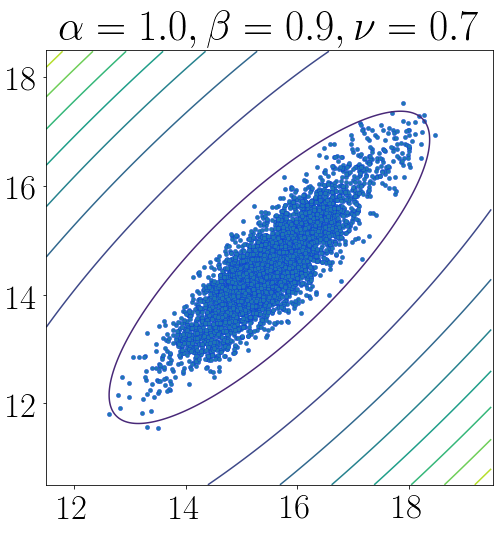

In [10]:
gen_plot(1.0, 0.9, 0.7, x_st=11.5, x_end=19.5, y_st=10.5, y_end=18.5)

Mean loss = 0.02


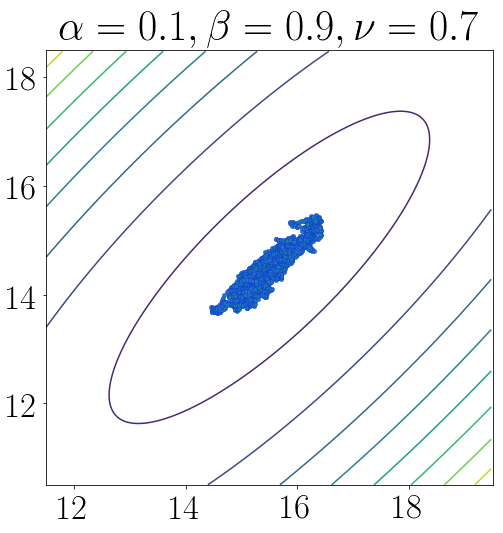

In [11]:
gen_plot(0.1, 0.9, 0.7, x_st=11.5, x_end=19.5, y_st=10.5, y_end=18.5)

Mean loss = 0.06


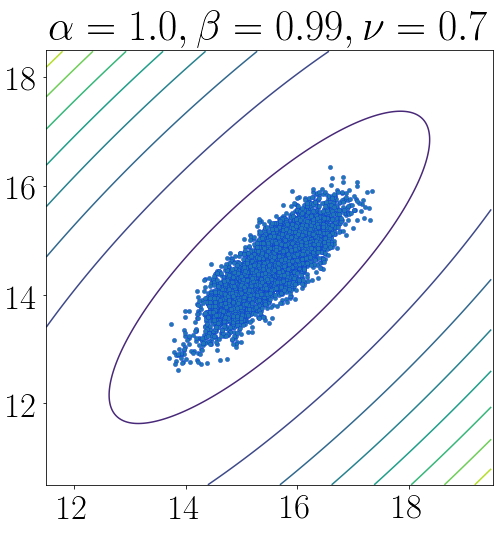

In [12]:
gen_plot(1.0, 0.99, 0.7, x_st=11.5, x_end=19.5, y_st=10.5, y_end=18.5)

Mean loss = 0.14


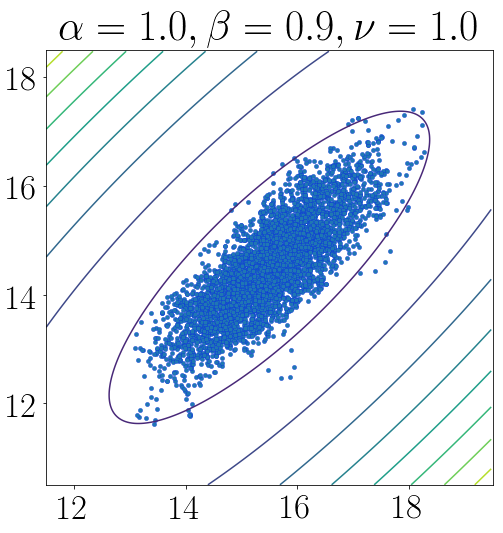

In [13]:
gen_plot(1.0, 0.9, 1.0, x_st=11.5, x_end=19.5, y_st=10.5, y_end=18.5)

#### Bottom row of Figure 2

Mean loss = 0.83


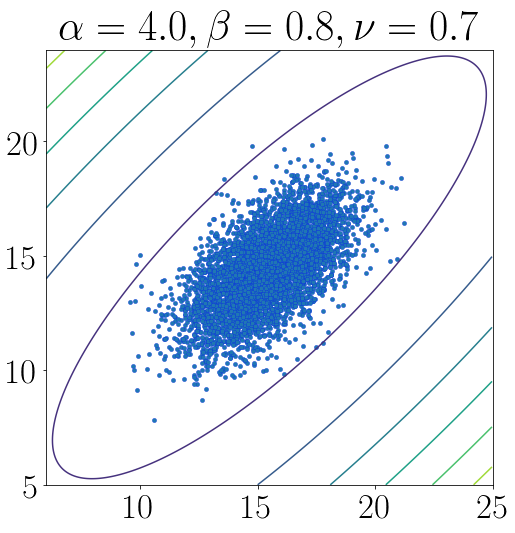

In [14]:
gen_plot(4.0, 0.8, 0.7)

Mean loss = 0.05


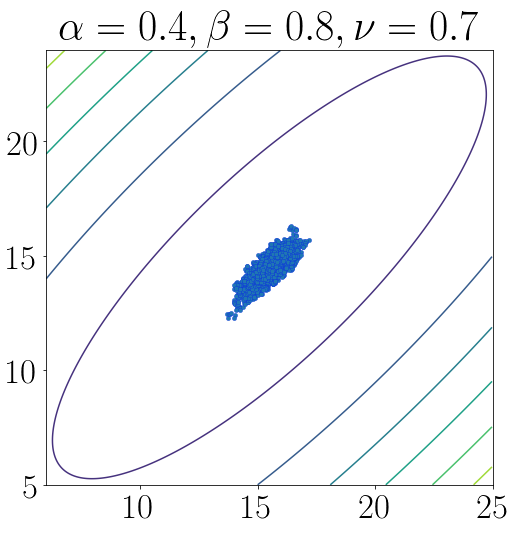

In [15]:
gen_plot(0.4, 0.8, 0.7)

Mean loss = 0.46


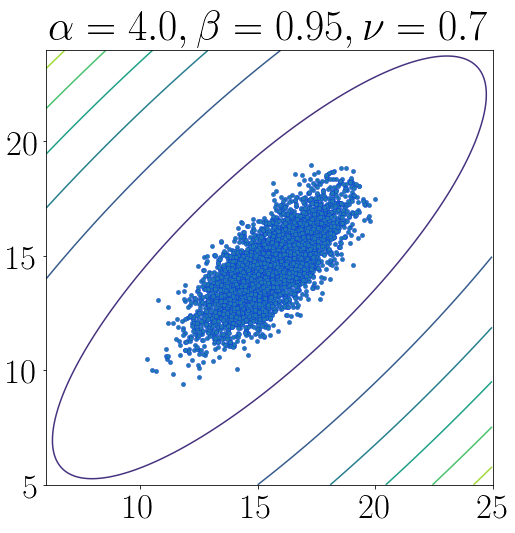

In [16]:
gen_plot(4.0, 0.95, 0.7)

Mean loss = 0.69


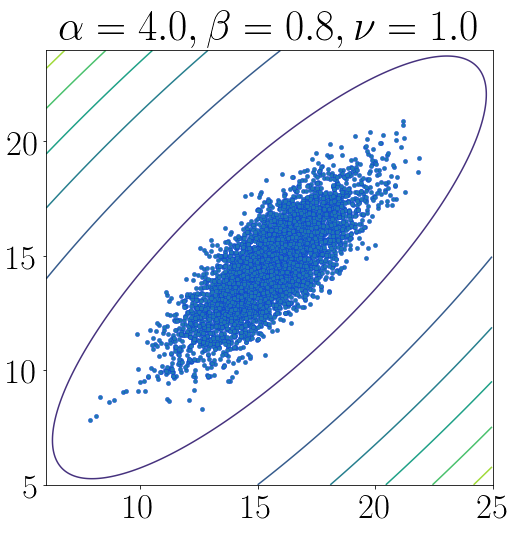

In [17]:
gen_plot(4.0, 0.8, 1.0)

#### Plots for Figure 3 (top row)

In [18]:
plt.rcParams.update({'font.size': 30})

L = 10.0
mu = 0.1
b = np.array([2.0, 1.0])
rot_m = np.sqrt(2) / 2.0 * (np.array([[1.0, -1.0], [1.0, 1.0]]))
A = rot_m.T.dot(np.array([[L, 0], [0, mu]])).dot(rot_m)
noise_cov = np.array([[0.3, 0.0], [0.0, 0.3]])
w_opt = np.linalg.inv(A).dot(b)

def f(w):
    return 0.5 * w.T.dot(A).dot(w) - b.dot(w)

def g(w):
    return A.dot(w) - b + np.random.multivariate_normal(np.zeros(2), 
                                                        noise_cov, size=1).squeeze()

f_opt = f(w_opt)

In [19]:
def gen_plots(nu, T=1000, thresh=0.2):  
    alphas = np.linspace(0.01, 1.5, 30)
    betas = np.linspace(0.0, 0.999, 30)
    results_arr = np.empty((alphas.shape[0], betas.shape[0]))
    alphas_XY = np.empty((alphas.shape[0], betas.shape[0]))
    betas_XY = np.empty((alphas.shape[0], betas.shape[0]))
    results = {}

    for i, alpha in enumerate(alphas):
        for j, beta in enumerate(betas):
            if alpha >= 2 * (1 + beta) / (L * (1 + beta * (1 - 2 * nu))):
                results[alpha, beta] = thresh
            else:
                _, results[alpha, beta] = qhm(w_opt, alpha, beta, nu, f, g, T=T, avg_sz=T)
                results[alpha, beta] -= f_opt
                if results[alpha, beta] > thresh:
                    results[alpha, beta] = thresh
            results_arr[i, j] = results[alpha, beta]
            alphas_XY[i, j] = alpha
            betas_XY[i, j] = beta

    fig = plt.figure(figsize=(12, 8))
    CS = plt.contourf(alphas_XY, betas_XY, results_arr, 30, cmap=plt.cm.binary)
    plt.ylim(0.0, 1.0)
    plt.xlabel('$\\alpha$')
    plt.ylabel('$\\beta$')
    plt.title("Quadratic function ($\\nu={}$)".format(nu), y=1.02)
    conv_bnds_alpha = [(alpha * L - 2) / (2 - alpha * L * (1 - 2 * nu)) for alpha in alphas]
    plt.plot(alphas, conv_bnds_alpha, c="r")
    cbar = plt.colorbar(CS)

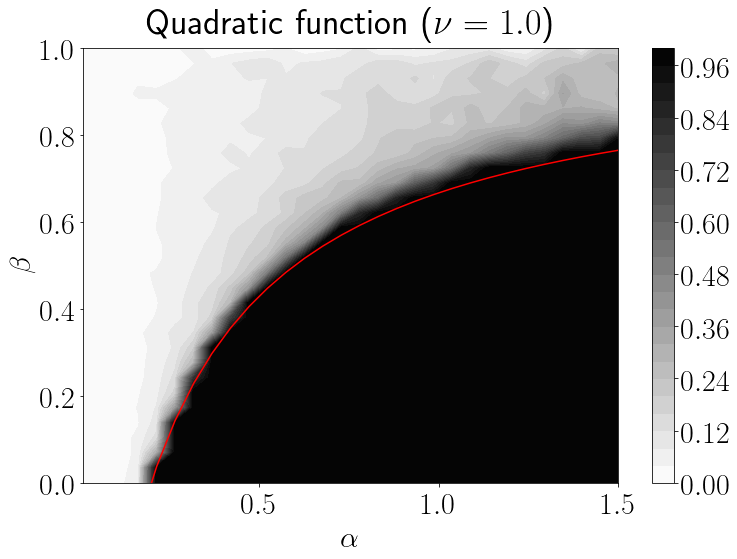

In [20]:
gen_plots(nu=1.0, thresh=1.0)

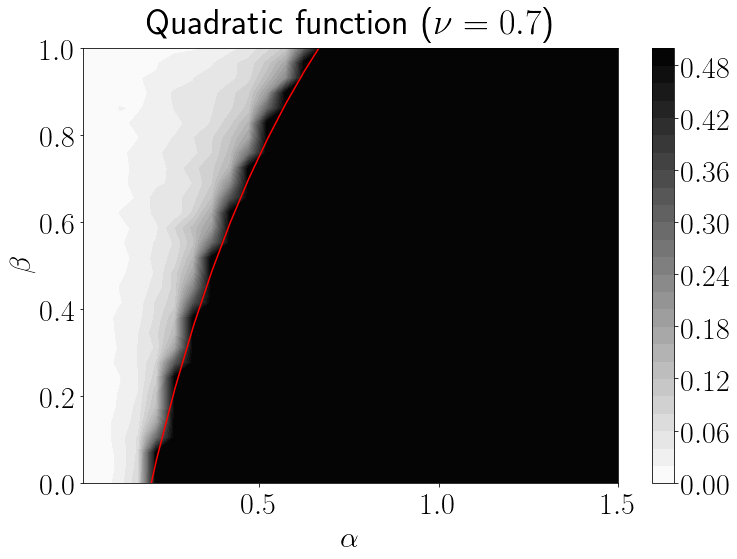

In [21]:
gen_plots(nu=0.7, thresh=0.5)

In [22]:
def gen_plots(alpha, T=1000, thresh=0.2):    
    nus = np.linspace(0.0, 1.0, 30)
    betas = np.linspace(0.0, 0.999, 30)
    results_arr = np.empty((nus.shape[0], betas.shape[0]))
    nus_XY = np.empty((nus.shape[0], betas.shape[0]))
    betas_XY = np.empty((nus.shape[0], betas.shape[0]))
    results = {}

    for i, nu in enumerate(nus):
        for j, beta in enumerate(betas):
            lr_fn = lambda k: alpha
            beta_fn = lambda k: beta
            nu_fn = lambda k: nu
            if alpha >= 2 * (1 + beta) / (L * (1 + beta * (1 - 2 * nu))):
                results[nu, beta] = thresh
            else:
                _, results[nu, beta] = qhm(w_opt, alpha, beta, nu, f, g, T=T, avg_sz=T)
                results[nu, beta] -= f_opt
                if results[nu, beta] > thresh:
                    results[nu, beta] = thresh
            results_arr[i, j] = results[nu, beta]
            nus_XY[i, j] = nu
            betas_XY[i, j] = beta

    fig = plt.figure(figsize=(12, 8))
    CS = plt.contourf(nus_XY, betas_XY, results_arr, 30, cmap=plt.cm.binary)
    plt.ylim(0.0, 1.0)
    plt.xlim(0.001, 1.0)
    plt.xlabel('$\\nu$')
    plt.ylabel('$\\beta$')
    plt.title("Quadratic function ($\\alpha={}$)".format(alpha), y=1.02)
    conv_bnds_nu = [(alpha * L - 2) / (2 - alpha * L * (1 - 2 * nu)) for nu in nus]
    plt.plot(nus[6:], conv_bnds_nu[6:], c="r")
    cbar = plt.colorbar(CS)

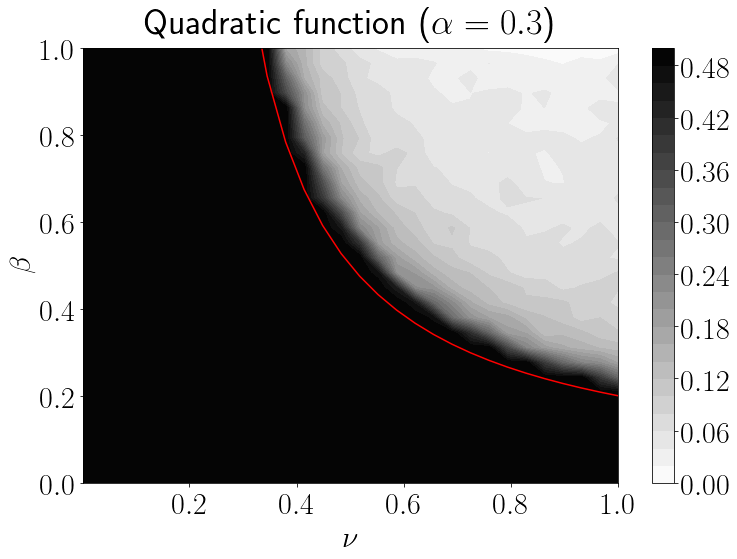

In [23]:
gen_plots(alpha=0.3, thresh=0.5)

The above code can be used to repeat experiments described in Appendix F (quadratic function part), by substituiting appropriate hyperparameters in `gen_plots` function.

We do not provide code to plot pictures from bottom row of Figure 3, since that code is highly dependent on our parallel implementation and cluster environment. However, you can use scripts from `lr_on_mnist` and `resnet_on_cifar` to reproduce training of logistic regression on MNIST or ResNet-18 on CIFAR-10 with QHM. In order to reproduce pictures from Figure 3, you would need to run those scripts with the whole set of hyperparameters listed in Appendix F and then use similar code to the `gen_plots` function above to plot results.

#### Figure 4 (a), (b)

In [24]:
w0 = np.array([-40, 8.0])

def get_plots(alphas, betas, nus, T):    
    wss = []
    for i, (alpha, beta, nu) in enumerate(zip(alphas, betas, nus)):
        ws, _ = qhm(w0, alpha, beta, nu, f, g, T=T, avg_sz=T)
        wss.append(ws)
        
    fig = plt.figure(figsize=(10, 5))
    for i, title in enumerate(['$$\\alpha={}$$'.format(alpha) for alpha in alphas]):
        f_vals = np.apply_along_axis(f, 1, wss[i]) - f_opt
        f_vals[f_vals < 1e-14] = 1e-14
        smoothed_vals = f_vals.copy()
        sz = 100
        run_sum = 0
        for j in range(f_vals.shape[0]):
            run_sum += f_vals[j]
            if j < sz - 1:
                smoothed_vals[j] = run_sum / (j + 1)
                continue
            smoothed_vals[j] = run_sum / sz
            run_sum -= f_vals[j - sz - 1]
        plt.semilogy(np.arange(wss[i].shape[0]), smoothed_vals, label=title)
        
    plt.legend()
    plt.xlabel('iteration')
    plt.ylabel('average loss')
    plt.title('Quadratic function', y=1.02)

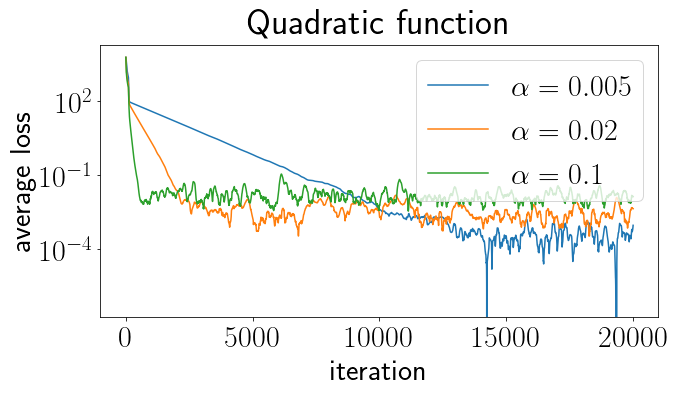

In [25]:
get_plots([0.005, 0.02, 0.1], [0.9, 0.9, 0.9], [1.0, 1.0, 1.0], 20000)

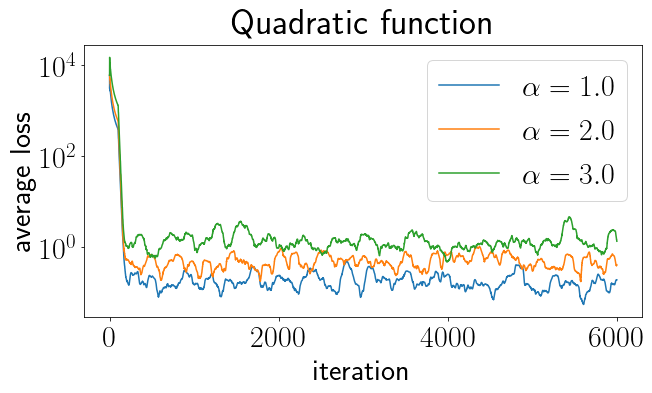

In [26]:
get_plots([1.0, 2.0, 3.0], [0.9, 0.9, 0.9], [1.0, 1.0, 1.0], 6000)

#### Figure 6

In [27]:
def get_approx_error(alpha, beta, nu, T):
    ws, _ = qhm(w_opt, alpha, beta, nu, f, g, T=T, avg_sz=T)
    cov_matrix = np.cov(ws.T)
    lhs = np.trace(A.dot(cov_matrix))
    
    tr_sigm = np.trace(noise_cov)
    tr_Asigm = np.trace(A.dot(noise_cov))
    rhs = alpha / 2 * tr_sigm + tr_Asigm * (alpha ** 2 / 4 + 
                                            alpha ** 2 / 4 * (2 * nu * beta) / (1 - beta) * 
                                            ((2 * nu * beta) / (1 + beta) - 1))
    return np.abs(lhs - rhs) / max(np.abs(lhs), np.abs(rhs))

def gen_plot(T, alpha, betas, nus, rel_thresh=0.2):
    sz1 = betas.shape[0]
    sz2 = nus.shape[0]
    
    res = np.empty((sz1, sz2))
    betas_XY = np.empty((sz1, sz2))
    nus_XY = np.empty((sz1, sz2))

    for i, beta in enumerate(betas):
        for j, nu in enumerate(nus):
            res[i, j] = get_approx_error(alpha, beta, nu, T)
            betas_XY[i, j] = beta
            nus_XY[i, j] = nu

    res_new = np.ones_like(res) * rel_thresh
    res_new[res < rel_thresh] = res[res < rel_thresh]

    fig = plt.figure(figsize=(12, 8))
    CS = plt.contourf(betas_XY, nus_XY, res_new, 30, cmap=plt.cm.binary)
    plt.xlabel('$\\beta$')
    plt.ylabel('$\\nu$')
    plt.xlim(0, 1)
    plt.title("$\\alpha={}$".format(alpha), y=1.01)
    cbar = plt.colorbar(CS)
    
betas = np.linspace(0.0, 0.999, 20)
nus = np.linspace(0.0, 1.0, 20)

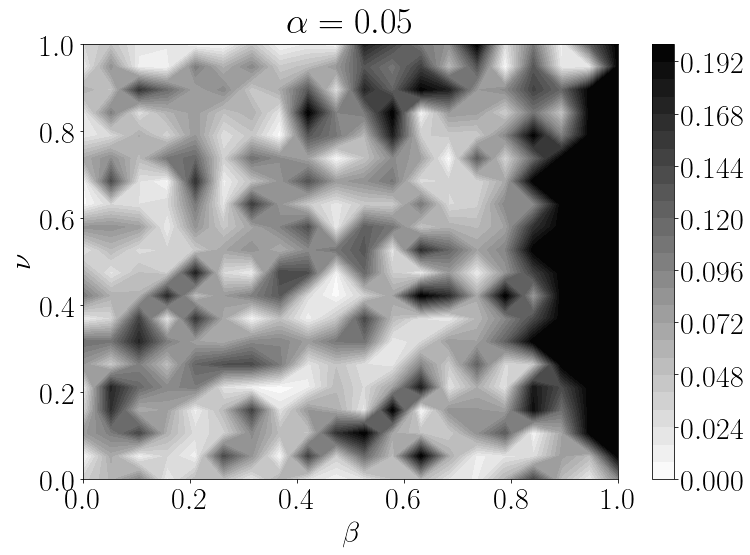

In [28]:
gen_plot(10000, 0.05, betas, nus)

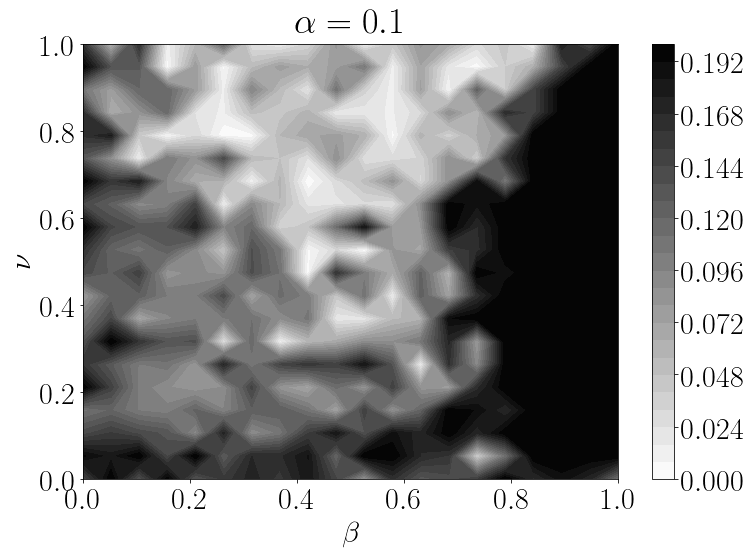

In [29]:
gen_plot(10000, 0.1, betas, nus)

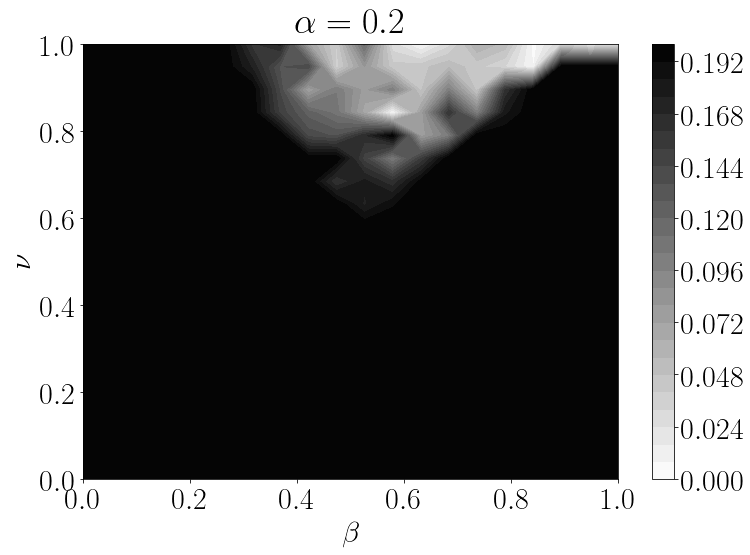

In [30]:
gen_plot(10000, 0.2, betas, nus)